Testing using IBM Quantum Computers

In [37]:
import json
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, OptionsV2 as Options
import numpy as np
from quantum_check import construct_circuit
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_distribution
from quantum_check import check_consistency

In [5]:
with open('key.json') as f:
    config = json.load(f)

ibm_api_key = config["ibm_api_key"]

QiskitRuntimeService.save_account(channel="ibm_quantum", token=ibm_api_key, overwrite=True)

In [37]:
def classic_complexity(func: int, var: int) -> int: #O(m2^n)
    return func * (2**var)

#errors ϵ=0.0884 , ϵ=0.0625 , and ϵ=0.0442
def quantum_complexity(func: int, error: float) -> int: #O(mϵ^−2)
    return func / (error**2)

In [48]:
terms = ["0x10","0xx0","x01x"]
var = 9 #n
func = 3 #m

error = 0.0884

print(f"Classical complexity: {classic_complexity(func, var)}")
print(f"Quantum complexity: {quantum_complexity(func, error)}")

Classical complexity: 1536
Quantum complexity: 383.8987735713846


In [39]:
service = QiskitRuntimeService()

backend = service.least_busy(operational=True)

#Data
terms = ["0x11","0xx0","x01x"]
var = 4 #n
func = 3 #m
shot = 64

circuit = construct_circuit(terms, var, func)
t_circuit = transpile(circuit, backend)

sampler = Sampler(mode=backend)

job = sampler.run([t_circuit], shots = shot)
result = job.result()

pub_result = result[0]
pub_counts = pub_result.data.measure_a.get_counts()

{'0000': 23, '0001': 1, '0011': 31, '1111': 2, '0010': 2, '1100': 3, '1110': 1, '1000': 1}
{'0000': 0.359375, '0001': 0.015625, '0011': 0.484375, '1111': 0.03125, '0010': 0.03125, '1100': 0.046875, '1110': 0.015625, '1000': 0.015625}
The system is consistent. C=1.0307764064044151


True

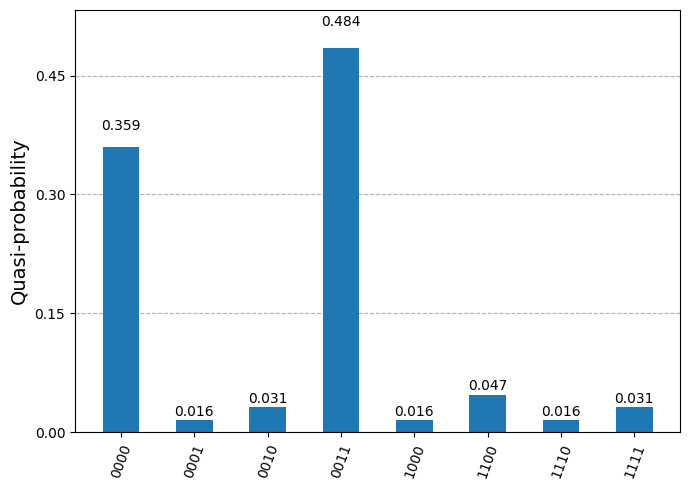

In [41]:
#pub = {'0001': 4, '0111': 3, '1101': 5, '1100': 10, '1111': 12, '0011': 11, '1000': 1, '0110': 2, '1010': 1, '1110': 8, '0000': 5, '1011': 1, '0010': 1}
print(pub_counts)
total_shots = sum(pub_counts.values())

probabilities = {k:v/shot for k,v in pub_counts.items()}
print(probabilities)

plot_distribution(probabilities);

check_consistency([probabilities.get('0011',0),probabilities.get('1100',0)])



TODO:

- Set up simulation and run in IBM
- Set up loop that goes through data.csv and use that data for simulation runs
- Compare theoretical vs. experimental values of simulation (plot graphs, have std on graph if possible)
    - Use error tolerance in analysis 
- Compare to results of classical
- Compare runtimes of classical vs. quantum for all data sets (plot graph comparing runtimes)
